<a href="https://colab.research.google.com/github/soowanchoi/swanscodex/blob/main/swanscodex_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**S**ingular **V**alue **D**ecomposition & **P**rincipal **C**omponent **A**nalysis
**Dimensionality Reduction: SVD(PCA(Eigendecomposition)) --> Eigenvectors(Eigenvalues(Determinant))**

**Soowan Choi** 

# **1) Problem**
**1.1) Dimensionality Reduction** 
  - decrease the number of features to **GENERALIZE** (minimize overfit & underfit) 

**1.2) Explore**
- covid data of the world 
  - 2020/02/24 ~ 2022/10/01
- relevant columns: 
  - location 
  - date
  - total_cases


Reference: https://github.com/owid/covid-19-data/tree/master/public/data

**1.1) Dimensionality Reduction**

In [148]:
import pandas as pd

# read csv file from github source
covid_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',
    thousands=',')

**1.2) Explore**

In [149]:
# look at the last few rows of data
covid_raw.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
220793,ZWE,Africa,Zimbabwe,2022-09-28,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220794,ZWE,Africa,Zimbabwe,2022-09-29,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220795,ZWE,Africa,Zimbabwe,2022-09-30,257465.0,56.0,25.143,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220796,ZWE,Africa,Zimbabwe,2022-10-01,257465.0,0.0,21.000,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220797,ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# **2) Data**
**2.1) Clean**   
2.2) ~~Xy Split~~   
2.3) ~~Test/Train Split~~    
**2.4) Standardize**


**2.1) Clean**

In [150]:
# we are only interested in the total cases each day for each country
cases = covid_raw[['location','date','total_cases']]

# set the date as the index
cases = cases.set_index('date')

In [151]:
# EXAMPLE: specify a specific country 
cases[cases['location']=='Afghanistan'].iloc[:,1]

date
2020-02-24         5.0
2020-02-25         5.0
2020-02-26         5.0
2020-02-27         5.0
2020-02-28         5.0
                ...   
2022-09-28    198876.0
2022-09-29    199067.0
2022-09-30    199188.0
2022-10-01    199310.0
2022-10-02    199386.0
Name: total_cases, Length: 952, dtype: float64

In [152]:
# create empty dataframe
df = pd.DataFrame()
# column data = country | row data = date
df['Afghanistan'] =  cases[cases['location']=='Afghanistan'].iloc[:,1]

# create new dataframe with new column and row data
countries = cases['location'].unique()
for country in countries:
 df[country] = cases[cases['location']==country].iloc[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


In [153]:
# .shape() -> (# days, # countries)
print(df.shape)
df = df.fillna(0)
df.head()

(952, 244)


,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,79558.0,0.0,0.0,0.0
2020-02-25,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,80412.0,0.0,0.0,0.0
2020-02-26,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,81384.0,0.0,0.0,0.0
2020-02-27,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,82728.0,0.0,0.0,0.0
2020-02-28,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,84152.0,0.0,0.0,0.0


**2.4) Standardize**

In [154]:
# standardize the data (standardize for each day across the countries)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                         # define the standard scaler
scaled = scaler.fit_transform(df.T)               # TRANSPOSE -> standardize each day

# convert to dataframe to plot using function
scaled = pd.DataFrame(scaled, columns = df.T.columns, index = df.T.index) 
scaled.std(axis='index')                                # to verify standard deviation of cases for each day is 1
scaled.mean(axis='index')                               # to verify mean of cases for each day is 0 

date
2020-02-24   -1.858714e-16
2020-02-25    1.947440e-16
2020-02-26    1.321802e-16
2020-02-27   -1.699460e-16
2020-02-28    6.438384e-17
                  ...     
2022-09-28   -1.217150e-17
2022-09-29   -2.411550e-17
2022-09-30    2.684556e-17
2022-10-01    3.560449e-17
2022-10-02   -1.194400e-17
Length: 952, dtype: float64

**Visualize the data**

In [155]:
# function to plot time-series
import matplotlib.pyplot as plt  

def subpl(df,countries):  
  # create figure                                                         
  plt.figure()                     
  # plot for each country                                                  
  ax = df[countries].plot(subplots = True, layout = (20,15),figsize = (35,35),legend = True,rot=90) 
  # show the plots
  plt.show()                                                                              

<Figure size 432x288 with 0 Axes>

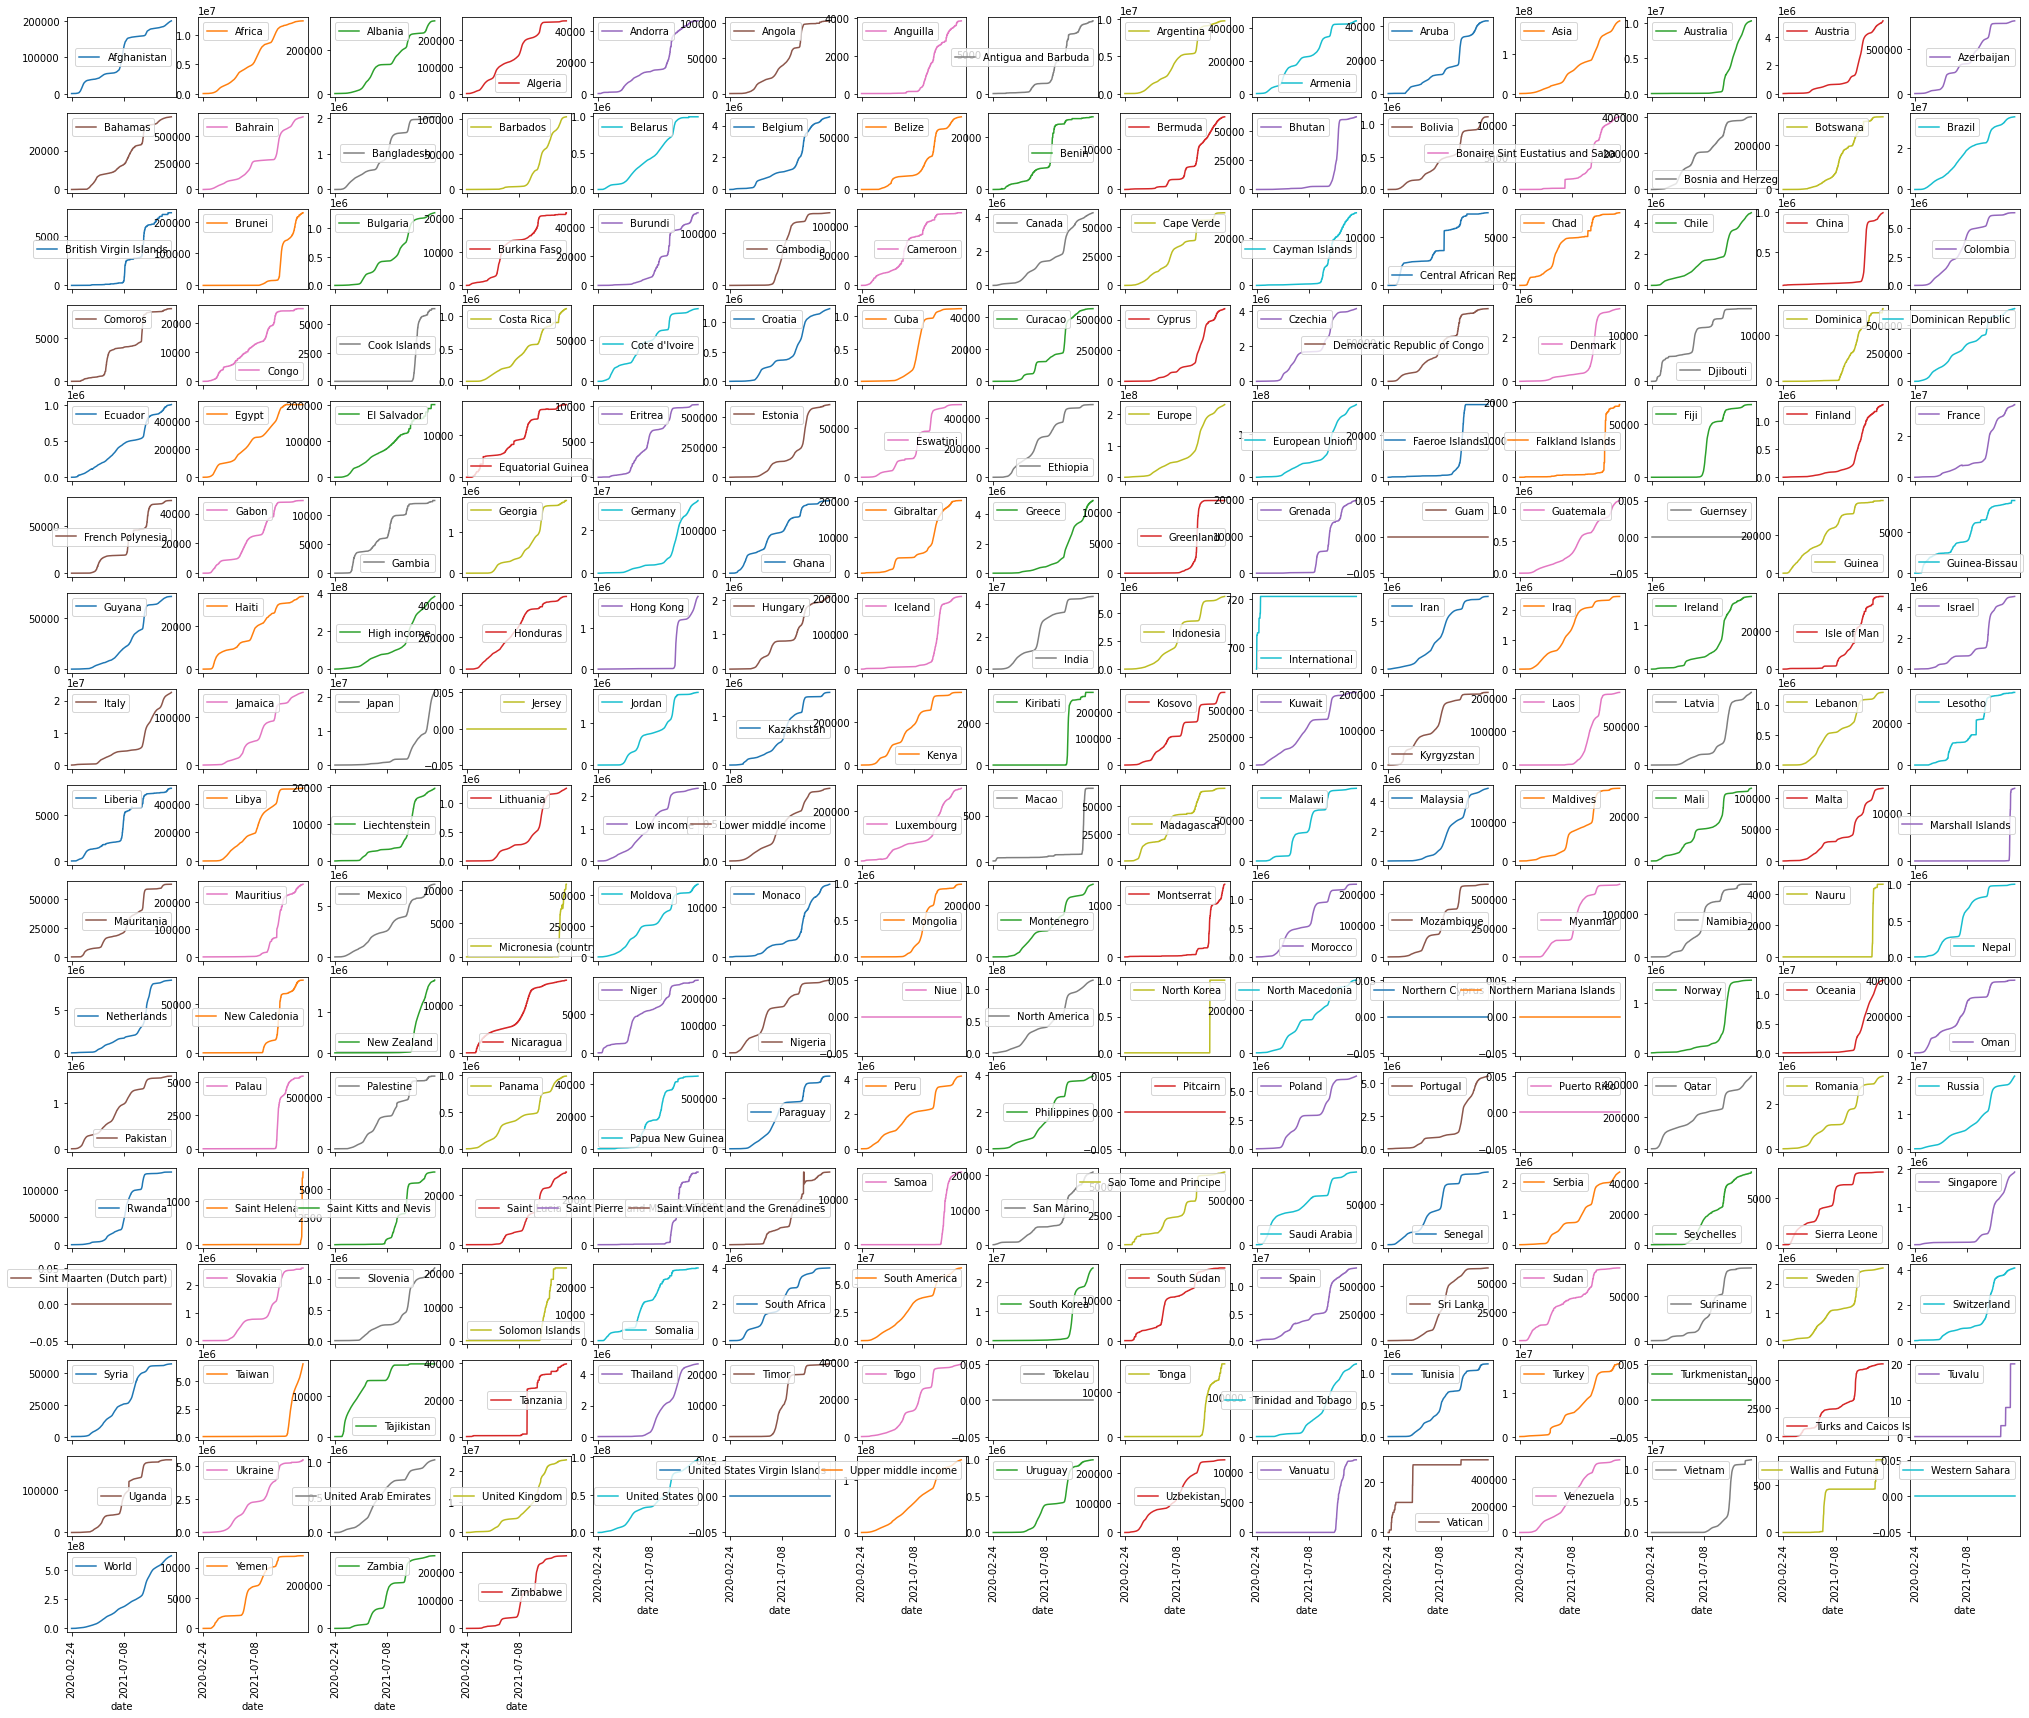

In [156]:
# plot raw dataset for all countries
subpl(df,df.columns)

<Figure size 432x288 with 0 Axes>

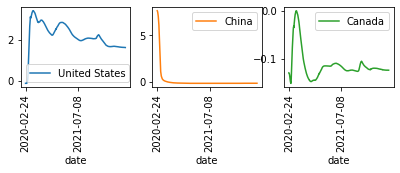

In [157]:
# plot standardized dataset for US, China and Canada
subpl(scaled.T,['United States','China','Canada']) #try Korea, South

<Figure size 432x288 with 0 Axes>

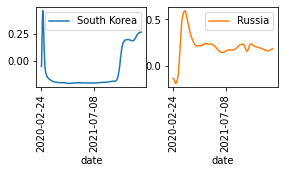

In [158]:
subpl(scaled.T,['South Korea','Russia'])


**The standardized time-series for the US, China, and Canada show increasing covid cases when the curve goes up and decreasing covid cases when curve goes down. For example, the standardized plot for China displays large values in covid cases at the beginning of the time series as COVID-19 was identified in China. On the other hand, the covid cases for US and Canada increase after covid was identified, after February 2020.** 

**The negative number in the standarized data represents the number of cases in the country that are below the average world covid cases at the specified day and the positive numbers represent the number of cases in the country that exceed the average world covid cases at the specified day.** 

# **3) Model: PCA**

**3.1)** Calculate covariance matrix of the dataframe
- (N, N) square matrix

**3.2)** Create a function that returns sorted eigenvalues and eigenvectors from covariance matrix
 - np.linalg.eigh
 - **COLUMNS = eigenVECTORS = PRINCIPAL COMPONENTS**

**3.3)** Visualize effectiveness of prinicpal components (eigenvectors) covering the variance of the dataset
- "scree plot"

**3.4)** Visualize first 16 principal components as time series
- x-axis: dates | y-axis: PC value

**3.5)** Function to **Reconstruct the Data**
- input: country and original dataset
- compute eigenvectors and eigenvalues
- for each country ... visualize 4 plots:
 1. original time series (NOT standardized)
 2. incremental reconstruction of original time series
  - ex. reconstruct with PC1, reconstruct with PC1 and PC2 etc.
  - reconstruct standardized time-series then rescale back to original
    - inverse_transform()
 3. residual error for reconstructing each day using best reconstruction
  - x-axis: dates | y-axis: residual error
 4. RMSE as function of number of included components
  - x-axis: number of components | y-axis: RMSE

**3.1)** Calculate covariance matrix of the dataframe

In [159]:
# covariance matrix is computed to create a nxn square matrix 
# (from mxn matrix of samplesxfeatures) for finding eigenvalues and eigenvectors

import numpy as np       
C = np.cov(scaled.T)      # compute covariance matrix
C.shape                   # check that dimensions of covariance matrix is (N,N)

(952, 952)

**3.2)** Create a function that returns sorted eigenvalues and eigenvectors 

In [160]:
# from the eigenvalues, the number eigenvalue tells us that the corresponding eigenvector(column) is most informative = BEST PRINCIPAL COMPONENT
# g1 = -0.52*feature1 + 0.26*feature2 - 0.58*feature3 - 0.57*feature4  --> new feature from combination of existing features = PRINCIPAL COM.

def eig_sorted(cov):                             # input covariance matrix
  # eigen decomposition
  eigVals, eigVecs = np.linalg.eigh(cov)         # returns eigenvalues and eigenvectors of symmetric(covariance) matrix 
  args = (-eigVals).argsort()
  eigVals = eigVals[args]                        # reverse the order from largest values to smallest
  eigVecs = eigVecs[:, args]
  return eigVals, eigVecs  

In [161]:
# use function on covariance matrix
eigenVals, eigenVecs = eig_sorted(C)                   

**3.3)** Visualize effectiveness of prinicpal components (eigenvectors) 

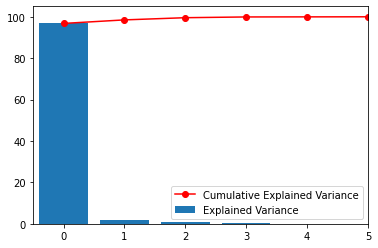

In [162]:
# blue bars show the eigenvalues and percentage, red line shows the cumulative variance

eigValSum = sum(eigenVals)                          #sum the eigenvalues
expVar = [eigV/eigValSum*100 for eigV in eigenVals] #variance of the dataset that is explained
cumExpVar = np.cumsum(expVar)                         #cumulative sum of variance of the dataset that is explained 

import matplotlib.pyplot as plt
plt.bar(range(len(eigenVals)), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.xlim(left=-0.5,right=5)
plt.show()

In [163]:
# how many PCs needed to cover 98% of the dataset's variance?
var98 = sum(expVar[0:2])
print(f'the first {len(expVar[0:2])} principal components takes into account {round(var98,2)} of the variance in the dataset')

the first 2 principal components takes into account 98.46 of the variance in the dataset


**As seen above, the first 2 principal components are required to cover 98% of the dataset's variance**

**3.4)** Visualize first 16 principal components as time series

In [164]:
first16 = eigenVecs[:,0:16]

import pandas as pd
eigenvectorDF = pd.DataFrame(first16,index= df.T.columns, columns = np.linspace(1,16,16))
eigenvectorDF.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
date,,,,,,,,,,,,,,,,
2020-02-24,0.019847,0.143881,-0.164846,-0.083329,-0.010905,0.087796,-0.008250,0.119915,-0.016264,0.082069,-0.171264,0.043633,0.094428,-0.090759,-0.076918,-0.032783
2020-02-25,0.019907,0.143478,-0.164855,-0.082918,-0.010177,0.086813,-0.006300,0.118087,-0.015816,0.078879,-0.166289,0.041766,0.092859,-0.088202,-0.072632,-0.033038
2020-02-26,0.020003,0.142834,-0.164861,-0.082261,-0.008717,0.085338,-0.002751,0.115419,-0.014877,0.073535,-0.157595,0.036772,0.089849,-0.083025,-0.064132,-0.035145
2020-02-27,0.020156,0.141814,-0.164858,-0.081130,-0.006366,0.083037,0.003316,0.110737,-0.013366,0.064694,-0.142067,0.027169,0.082423,-0.072041,-0.050017,-0.037939
2020-02-28,0.020339,0.140570,-0.164838,-0.079749,-0.003867,0.080259,0.009820,0.105178,-0.011587,0.055108,-0.125174,0.015027,0.074028,-0.059224,-0.034727,-0.040131


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0daca5c950>,
      dtype=object)

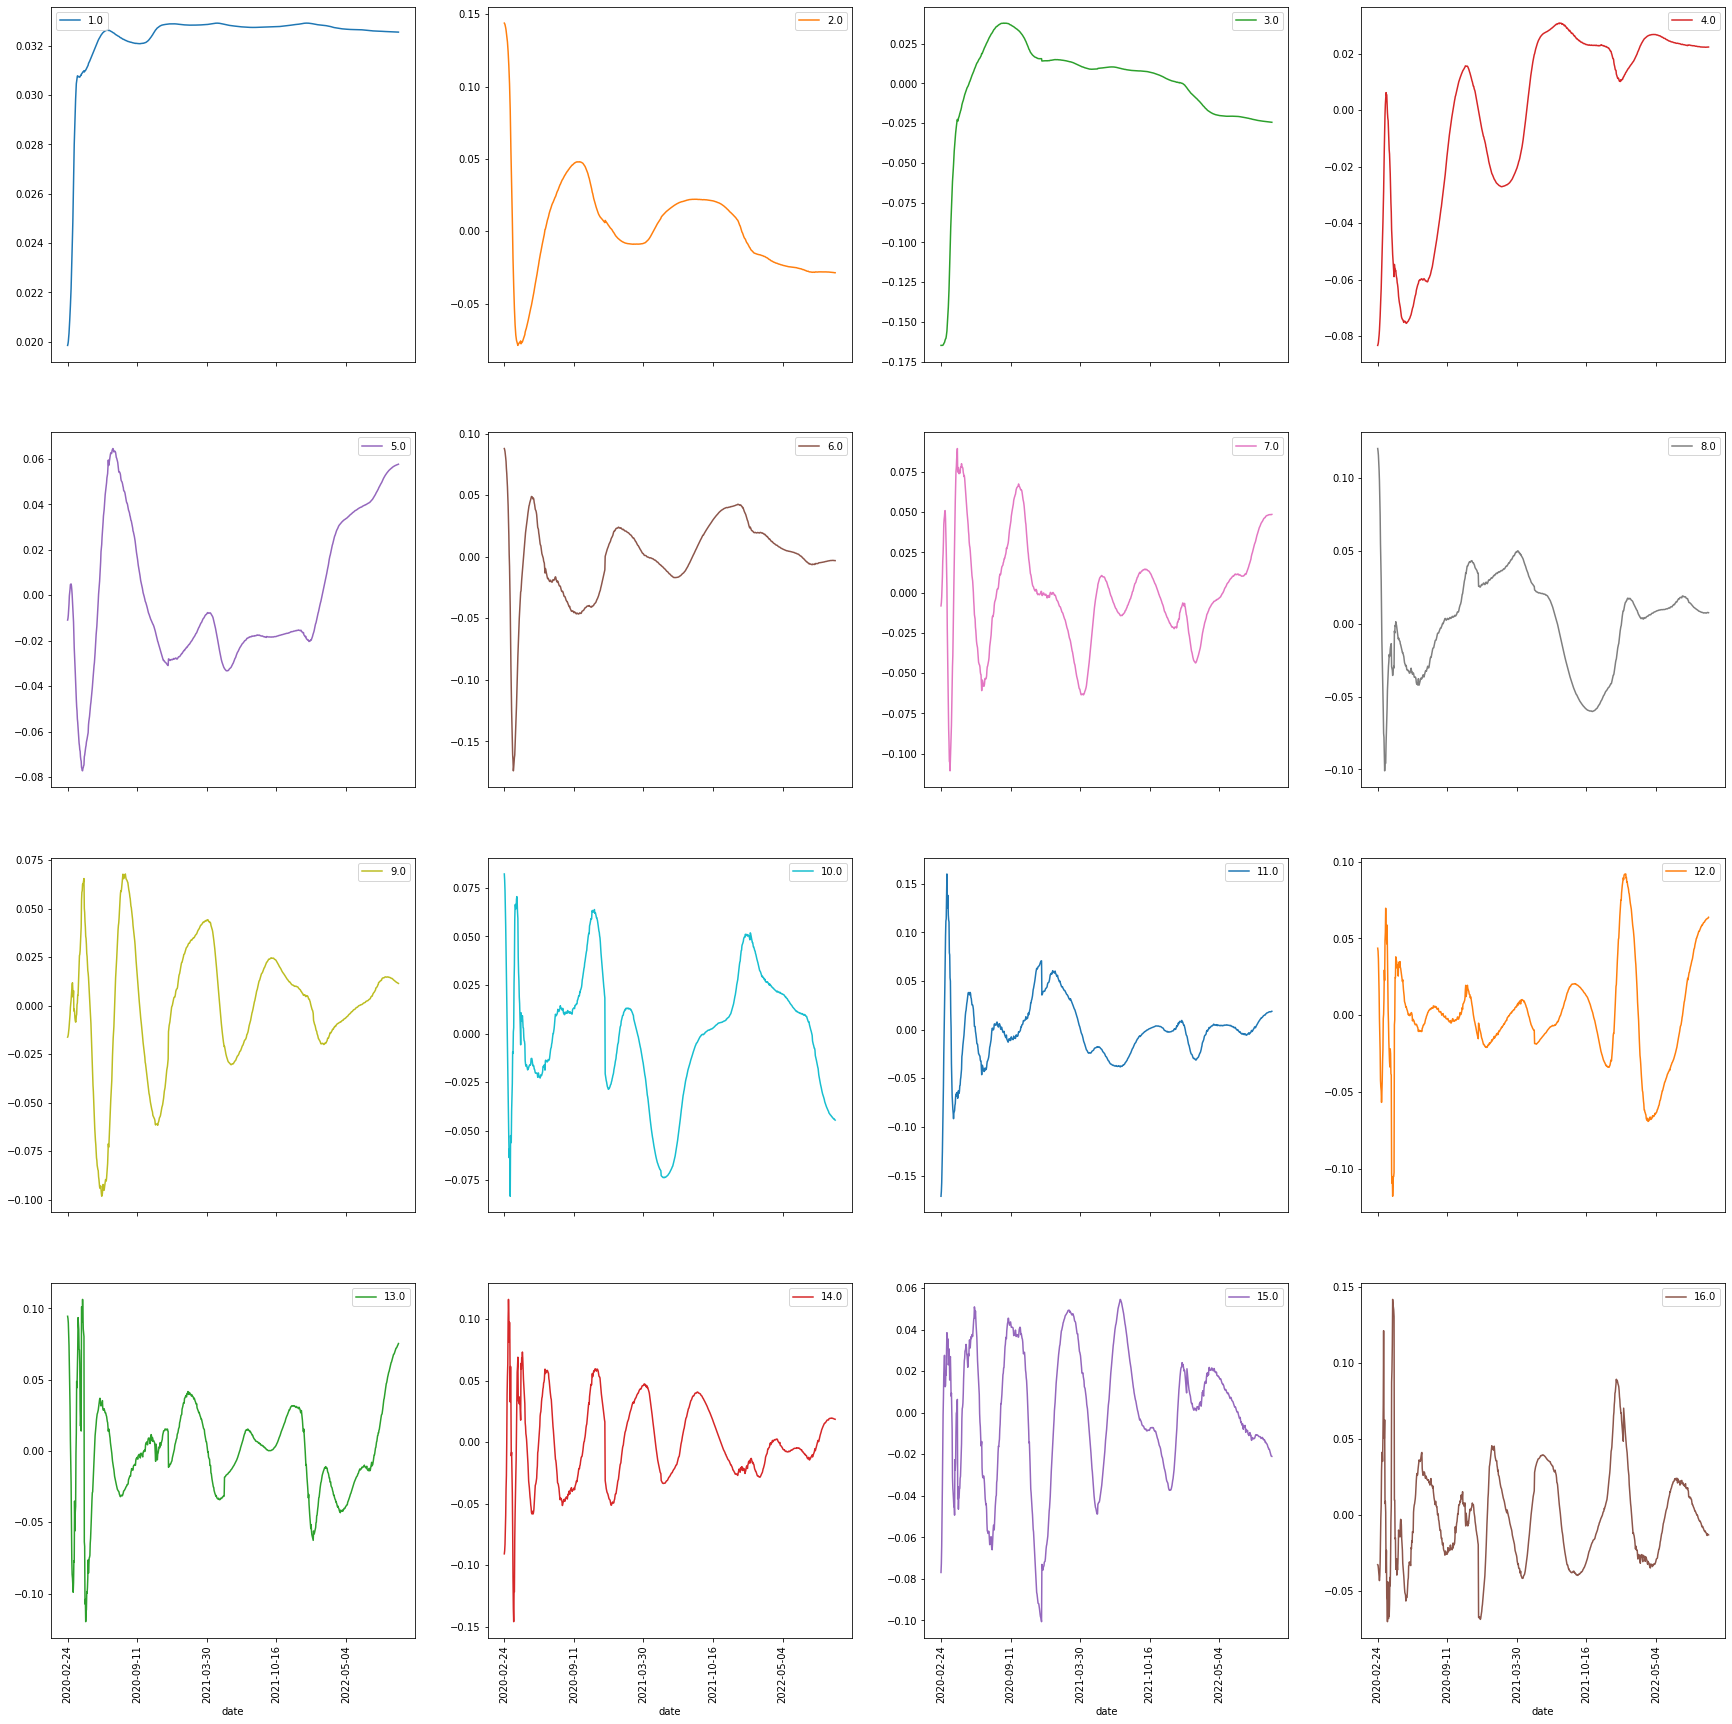

In [165]:
eigenvectorDF.plot(subplots = True, layout = (4,4),figsize = (30,30),legend = True,rot=90)     #legend = True uses columns  

**As seen in the 16 plots above, using the first principal component captures a large variance of the dataset. As the number of principal components increase, the variance in the dataset that is captured also increases. There is a distinct increase in variance captured with 2 principal components, and using 16 principal components captures the most variance in the dataset from the plots above. Thus, using 16 principal components would more accurately represent the original dataset matrix.**

**3.5)** Function to **Reconstruct the Data**

In [166]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd                   
from sklearn.metrics import mean_squared_error

In [167]:
def plot_reconstructed_country(original_df, country_name):   

  # SCALED DATA (PCA sensitive to variance) -> covariance matrix -> eigenvalues/eigenvectors -> PCA 
  # standardize the data (standardize for each day across the countries)   
  scaler = StandardScaler()                                                               # define the standard scaler
  scaled = scaler.fit_transform(original_df)                                              # standardize each day
  scaled = pd.DataFrame(scaled, columns = original_df.columns, index = original_df.index) # convert to dataframe to plot using function

  # compute the covariance matrix of cases DF     
  C = np.cov(scaled.T)      
  # compute eigenvalues and eigenvectors
  eigenVals, eigenVecs = eig_sorted(C)

  # Plot 1: original time-series for the specified country
  plt.figure()                                                                       
  ax1 = original_df.T[country_name].plot(subplots = True,legend = True,rot=90,title='Original Covid Data',xlabel='Dates',ylabel='Covid Cases') 
  plt.show()                                                                    

  # Plot 2: incremental reconstruction of the original (not standardized) time-series for the specified country
  # choose which Principal Components (eigenvectors)
  evec1 = eigenVecs[:, 0:1]    
  evec2 = eigenVecs[:, 0:2] 
  evec3 = eigenVecs[:, 0:4] 
  evec4 = eigenVecs[:, 0:8] 
  evec5 = eigenVecs[:, 0:16] 

  # projection using the principal components (project to new coordinate to represent max variance)
  projX1 = np.dot(scaled, evec1)   
  projX2 = np.dot(scaled, evec2) 
  projX3 = np.dot(scaled, evec3) 
  projX4 = np.dot(scaled, evec4) 
  projX5 = np.dot(scaled, evec5) 

  # reconstruction dataset using the projection
  ReconX1 = np.dot(projX1, evec1.T)      
  ReconX2 = np.dot(projX2, evec2.T)      
  ReconX3 = np.dot(projX3, evec3.T)      
  ReconX4 = np.dot(projX4, evec4.T)      
  ReconX5 = np.dot(projX5, evec5.T)    

  # back to original scale (non-standardized form)
  nonscaled1 = scaler.inverse_transform(ReconX1) 
  nonscaled2 = scaler.inverse_transform(ReconX2) 
  nonscaled3 = scaler.inverse_transform(ReconX3) 
  nonscaled4 = scaler.inverse_transform(ReconX4) 
  nonscaled5 = scaler.inverse_transform(ReconX5) 

  # create dataframe for plotting
  df1 = pd.DataFrame(nonscaled1, index = original_df.index, columns = original_df.columns)  
  df2 = pd.DataFrame(nonscaled2, index = original_df.index, columns = original_df.columns)   
  df3 = pd.DataFrame(nonscaled3, index = original_df.index, columns = original_df.columns)  
  df4 = pd.DataFrame(nonscaled4, index = original_df.index, columns = original_df.columns)  
  df5 = pd.DataFrame(nonscaled5, index = original_df.index, columns = original_df.columns)   
  data = pd.concat([df1.T[country_name], df2.T[country_name], df3.T[country_name],df4.T[country_name],df5.T[country_name]], axis = 1,
                  keys= ['Recon PC:1', 'Recon PC:1-2', 'Recon PC:1-4', 'Recon PC:1-8', 'Recon PC:1-16'])
  #plot                         
  data.plot(legend = True,rot=90,title='Reconstructed Covid Data',xlabel='Dates',ylabel='Covid Cases')   
  plt.show()                                                                                 

  # Plot 3 : Residual Error for best Reconstruction df5 (PC:1-16) 
  residual = original_df.T[country_name]  - df5.T[country_name]
  residual.plot(legend = True,rot=90,title='Residuals',xlabel='Dates',ylabel='Residuals')
  plt.show()

  # Plot 4: RMSE - standard dev --> variance 
  pc_100 = np.linspace(1,100,100)                     # array to index first 100 principal components
  RMSE = np.zeros(len(pc_100))                        # empty array of zeros to store RMSE values
  for i in pc_100:                                    # sweep first 100 eigenvectors (principal components)
      evec_ = eigenVecs[:, 0:int(i)]                  # eigenvector (principal components)
      projX_ = np.dot(scaled, evec_)                  # projection ONTO eigenvector (principal components)
      ReconX_ = np.dot(projX_, evec_.T)               # reconstruct dataset using projections
      nonscaled_ = scaler.inverse_transform(ReconX_)  # back to original scale (non-standardized form)

      # reconstruct dataset using projections 
      df_ = pd.DataFrame(data = nonscaled_, columns =original_df.columns, index= original_df.index)  
      # calculate RMSE for each data sample,
      # Squared = False returns RMSE (True returns MSE)
      RMSE[int(i-1)] = np.sqrt(mean_squared_error(original_df.T[country_name].values,
                                      df_.T[country_name].values, squared=False))                     
                                                                                              
  plt.plot(pc_100,RMSE)                      
  plt.xlabel('# of Principal Components')
  plt.ylabel('Root Mean Squared Error (RMSE)')
  plt.title('RMSE vs Principal Components')

  # notice how RMSE(variance) increases with more principal components

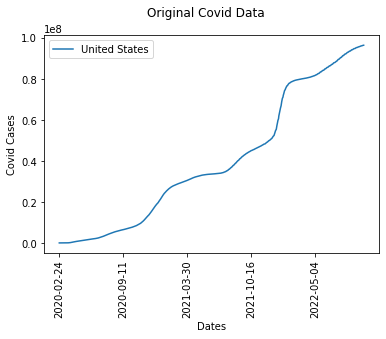

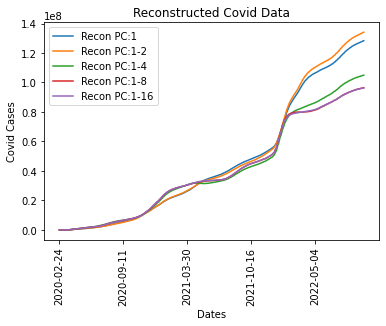

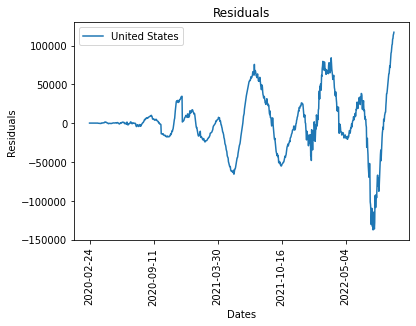

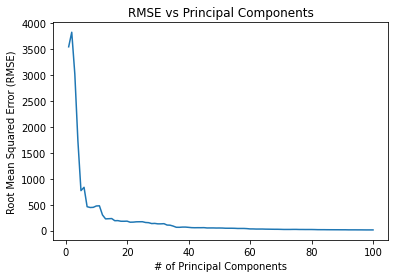

In [168]:
plot_reconstructed_country(df.T,'United States')

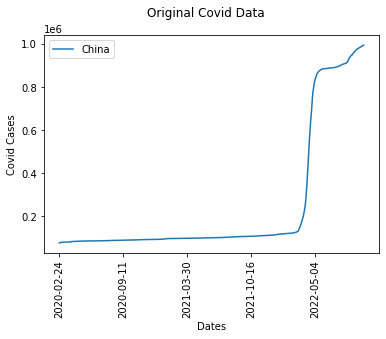

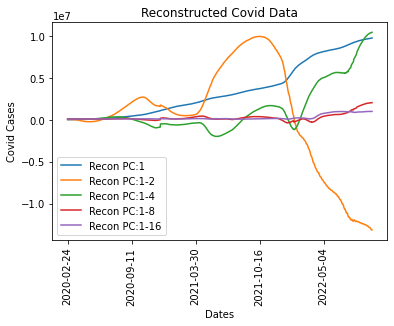

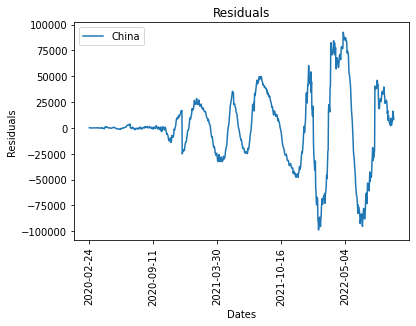

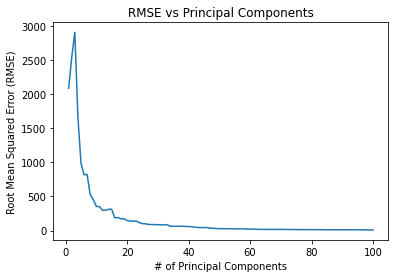

In [169]:
plot_reconstructed_country(df.T,'China')

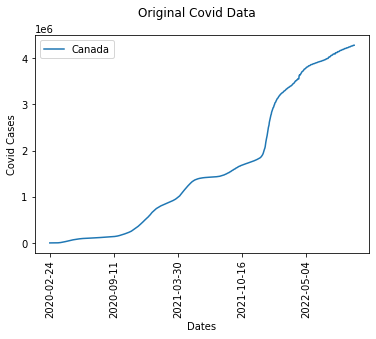

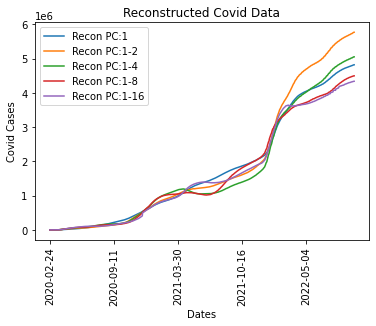

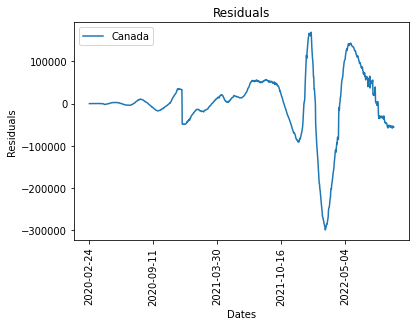

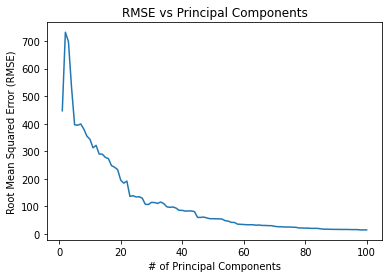

In [170]:
plot_reconstructed_country(df.T,'Canada')

# **4) Model: SVD**

**4.1)** Modify plot_reconstructed_country() function
- replace PCA with **SVD to calculate eigenvectors**

In [171]:
'''
#Practice to Check SVD method:
u = np.array([[1,2],[-2,1]])
print(u)
s = np.array([[-6,0,0],[0,1,0]])
print(s)
v = np.array([[1,0,1],[-2/5,1,2],[1/5,2,-1]])
print(v)
u@s@v.T
'''

'\n#Practice to Check SVD method:\nu = np.array([[1,2],[-2,1]])\nprint(u)\ns = np.array([[-6,0,0],[0,1,0]])\nprint(s)\nv = np.array([[1,0,1],[-2/5,1,2],[1/5,2,-1]])\nprint(v)\nu@s@v.T\n'

**4.1)** Modify plot_reconstructed_country() function

In [172]:
def plot_reconstructed_country_svd(original_df, country_name):    # accepts original dataset and country as inputs

  # compute SVD: left singular vector(u), singular values(s), right singular vector(v)
  # SVD -- >  covid df(244x952) = u(244x244) @ s(244x952) @ vh(952x952)
  # m = 244 rows and n = 952 columns for covid dataset
  m,n = original_df.shape                      
  u, s, vh = np.linalg.svd(original_df, full_matrices=True)   

  # NOTE: vh is already returned as a transposed matrix!

  s = np.diag(s)                                       # diagonalize the array of singular values
  sigma = np.zeros((m,n))                              # create a m=244 by n=952 matrix of zeros to add diagonal singular values
  sigma[:m,:m] = s                                     # create the singular values matrix (combine diagonal singular values with zeros matrix)
  # pd.DataFrame(u@sigma@vh,index=cases_raw.index,columns = cases_raw.columns) to see if we get the df matrix again!  

  # Plot 1: original time-series for the specified country
  plt.figure()                                                                            
  ax1 = original_df.T[country_name].plot(subplots = True,legend = True,rot=90,title='Original Covid Data',xlabel='Dates',ylabel='Covid Cases')   
  plt.show()                                                                              

  # Plot 2: incremental reconstruction of the original time-series for the specified country
  # reconstruction using SVD = u@sigma@vh
  ReconX1 = np.dot(u[:,0][np.newaxis].T,(np.dot(sigma[0,0],vh[0,:]))[np.newaxis])   # np.newaxis is required because 1D array 
  ReconX2 = np.dot(u[:,0:2],(np.dot(sigma[0:2,0:2],vh[0:2,:])))                     # first two principal components PC1,PC2
  ReconX3 = np.dot(u[:,0:4],(np.dot(sigma[0:4,0:4],vh[0:4,:])))                     # PC1,PC2,PC3,PC4
  ReconX4 = np.dot(u[:,0:8],(np.dot(sigma[0:8,0:8],vh[0:8,:])))                     # PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
  ReconX5 = np.dot(u[:,0:16],(np.dot(sigma[0:16,0:16],vh[0:16,:])))                 # PC1,PC2,PC3,PC4,PC5...

  # create dataframe for plotting
  df1 = pd.DataFrame(ReconX1, index = original_df.index, columns = original_df.columns)  
  df2 = pd.DataFrame(ReconX2, index = original_df.index, columns = original_df.columns)   
  df3 = pd.DataFrame(ReconX3, index = original_df.index, columns = original_df.columns)  
  df4 = pd.DataFrame(ReconX4, index = original_df.index, columns = original_df.columns)  
  df5 = pd.DataFrame(ReconX5, index = original_df.index, columns = original_df.columns)   
  data = pd.concat([df1.T[country_name], df2.T[country_name], df3.T[country_name],df4.T[country_name],df5.T[country_name]], axis = 1,
                  keys= ['Recon PC:1', 'Recon PC:1-2', 'Recon PC:1-4', 'Recon PC:1-8', 'Recon PC:1-16'])
  # plot                                                                              
  data.plot(legend = True,rot=90,title='Reconstructed Covid Data',xlabel='Dates',ylabel='Covid Cases')   
  plt.show()                                                                                

  # Plot 3: Residual Error for best Reconstruction df5 (PC:1-16) 
  residual = original_df.T[country_name]  - df5.T[country_name]
  residual.plot(legend = True,rot=90,title='Residuals',xlabel='Dates',ylabel='Residuals')
  plt.show()

  # Plot 4: RMSE - standard dev --> variance 
  pc_100 = np.linspace(0,99,100)                    # array to index first 100 principal components in left singular vector u
  RMSE = np.zeros(len(pc_100))                      # empty array of zeros to store RMSE values
  for i in pc_100:                                  # sweep first 100 eigenvectors (principal components)                         
    if i == 0:
      recon_ = np.dot(u[:,0][np.newaxis].T,(np.dot(sigma[0,0],vh[0,:]))[np.newaxis])
    else:
      recon_ = np.dot(u[:,0:int(i)+1],(np.dot(sigma[0:int(i)+1,:int(i)+1],vh[0:int(i)+1,:])))  
    # reconstruct dataset using projections  
    df_ = pd.DataFrame(data = recon_, columns =original_df.columns, index= original_df.index)  
    # calculate RMSE for each data sample, 
    # squared = False returns RMSE (True returns MSE)
    RMSE[int(i)] = np.sqrt(mean_squared_error(original_df.T[country_name].values,
                                      df_.T[country_name].values, squared=False))                     
                                                                                             
  plt.plot(pc_100,RMSE)                      
  plt.xlabel('# of Principal Components')
  plt.ylabel('Root Mean Squared Error (RMSE)')
  plt.title('RMSE vs Principal Components')

  # notice how RMSE(variance) increases with more principal components

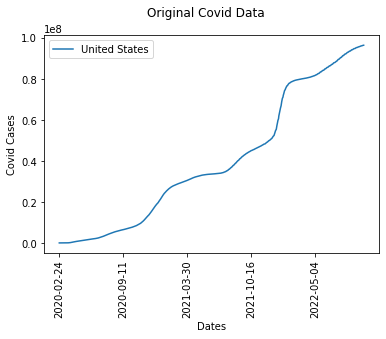

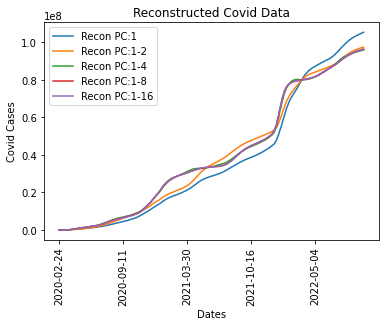

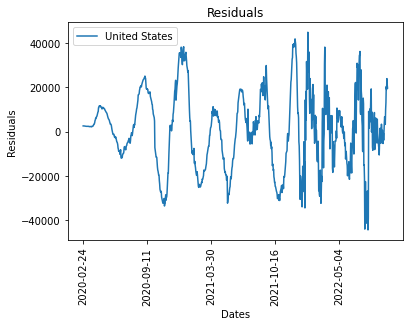

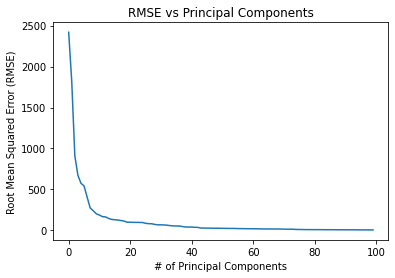

In [173]:
plot_reconstructed_country_svd(df.T, 'United States')

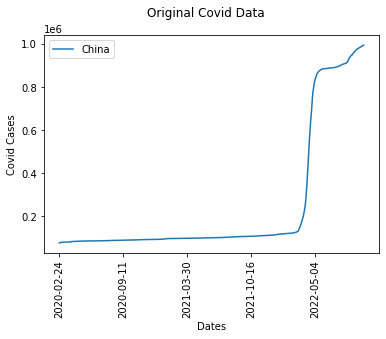

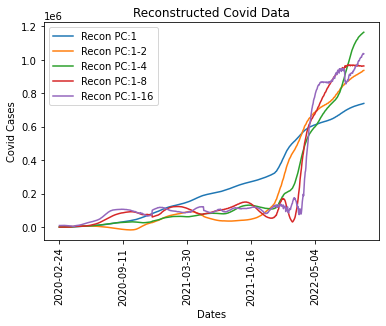

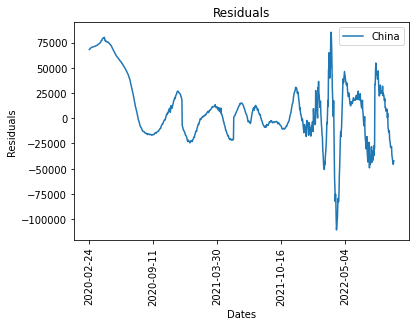

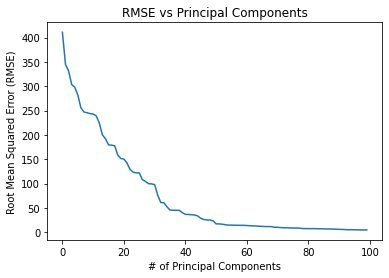

In [174]:
plot_reconstructed_country_svd(df.T, 'China')

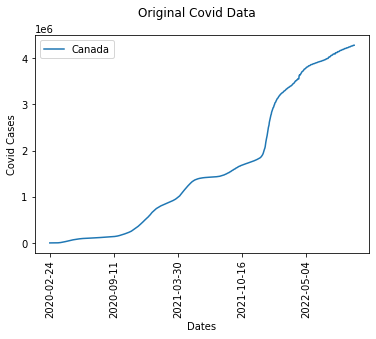

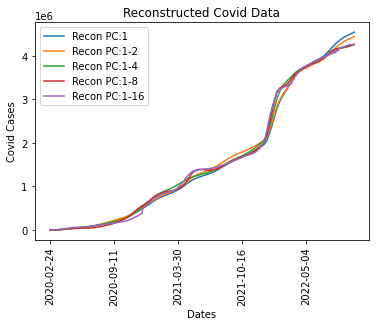

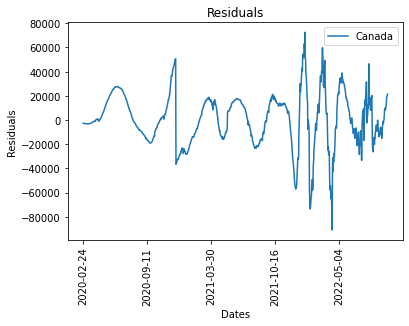

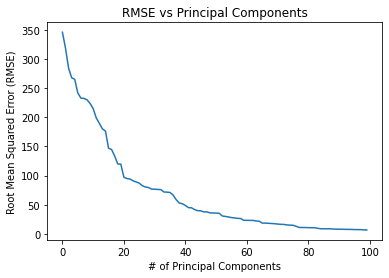

In [175]:
plot_reconstructed_country_svd(df.T, 'Canada')

**Square matrices are required to use PCA, and thus the covariance matrix (square matrix) is calculated from the rectangular matrix dataset. To calculate the covariance matrix of the dataset, the dataset needs to be standardized as they may have used different scales, which would affect the variance of the dataset.**

**Contrary to PCA, the SVD is able to work directly with the rectangular dataset (through the left singular vector, singular value matrix, and right singular vector) and does not require standardization, and thus does not require the covariance matrix to be computed.**

**Looking at the results in the graphs between 3) PCA and 4) SVD, the resulting graphs are similar. However, when specifically looking at the reconstructed graphs for the three countries (US, Canada, China), the SVD method seems to accurately represent the original covid data using less principal components compared to using the PCA method. The PCA is a specific form of component analysis compared to SVD. Since SVD is applied directly to the data matrix and not the covariance matrix, it produces more stable results.**

#**5) Example: Image Compression**
**5.1)** Load MNIST Handwritten Digits (X_train has 60,000 images)

**5.2)** Create new dataset of images of three distinct numbers (target labels)

**5.3)** Use SVD to calculate eigenvectors and eigenvalues

**5.4)** Visualize the first 10 eigenvectors

**5.5)** Create function that selects a random image and plots the original and reconstructed number
- takes parameter n --> reconstructed image uses the first n principal components

**5.1)** Load MNIST Handwritten Digits (X_train has 60,000 images)

In [176]:
from keras.datasets import mnist

# load data
# X features = 28 by 28 pixel images | y labels = numbers 0 to 9
# 60,000 train data | 10,000 test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [177]:
# encode each y labels integers 0 to 9: string labels
y_encoded = {0: "0",
1: "1",
2: "2",
3: "3",
4: "4",
5: "5",
6: "6",
7: "7",
8: "8",
9: "9"}

Number:  5


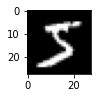

Number:  0


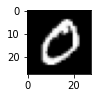

Number:  4


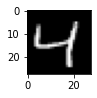

In [178]:
from matplotlib import pyplot
for i in range(3):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  print("Number: ", y_encoded[int(y_train[i])])
  pyplot.show()

**5.2)** Create new dataset of images of three distinct numbers (target labels)


In [179]:
# reshape 3D array to 2D array
print(X_train.shape)               # 28 by 28 pixels
X_train = X_train.reshape(60000,784,)
print(X_train.shape)               # 784 pixels total

(60000, 28, 28)
(60000, 784)


**All the label items in the MNIST dataset have identical sample (60,000) and feature (784 or 28 by 28) shapes. It is better to choose label items with a similar shape beause PCA identifies principal components that captures the most variance in the data to reduce the dimensionality of the dataset. If the shapes of the items are distinctly different, there will an increase in dataset size with more variance in the dataset and thus more principal components will be required to accurately capture the variance in the dataset.**

In [180]:
# labels chosen: Number 5 (5) | Number 8 (8) | Number 3 (3)
import pandas as pd 

df = pd.DataFrame(X_train)
df['target'] = y_train

# only keep rows with chosen labels and drop the target column 
df = df[df['target'].isin([5,8,3])].drop(['target'],axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



**5.3)** Use SVD to calculate eigenvectors and eigenvalues

In [181]:
import numpy as np
u,s,vh = np.linalg.svd(df,full_matrices = True) 
# Note: the left and right singular matrix (u and vh) represent the eigenvectors 
# Note: the singular value matrix (s) represents the square root of the eigenvalues as singular values

**5.4)** Visualize the first 10 eigenvectors

In [182]:
df.shape

(17403, 784)

Plotting the first 10 eigenvectors


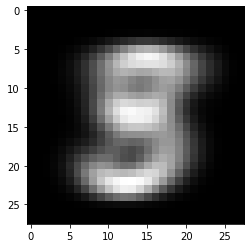

In [183]:
# reconstruct the data
m,n = df.shape  
s = np.diag(s)                                       # diagonalize the array of singular values
sigma = np.zeros((m,n))                              # create a m=17403 samples by n=784 pixels matrix of zeros to add diagonal singular values
sigma[:n,:n] = s                                     # NOTE: zero padding along rows since m_rows > n_columns
recons = np.dot(u[:,0:10],(np.dot(sigma[0:10,0:10],vh[0:10,:]))) 

import matplotlib.pyplot as plt

print('Plotting the first 10 eigenvectors')
# creating a mean item from all dataset items
plt.imshow(recons.mean(axis=0).reshape(28,28), cmap=plt.cm.gray)   
plt.show()

**From plotting the first 10 eigenvectors, the trends observed in the image above is that the images become superimposed from the features selected. The image is blurry and very pixelated.**

**5.5)** Create function that selects a random image and plots the original and reconstructed number

In [184]:
#4) create function to determine number of n principal components required for accurate representation of image
def plot_og_recon(n_pca):
  import matplotlib.pyplot as plt
  import pandas as pd
  import numpy as np
  
  # import the dataset
  from keras.datasets import mnist

  # load data
  # X features = 28 by 28 pixel images | y labels = numbers 0 to 9
  # 60,000 train data | 10,000 test data
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  # encode each y labels integers 0 to 9: string labels
  y_encoded = {0: "0",
               1: "1",
               2: "2",
               3: "3",
               4: "4",
               5: "5",
               6: "6",
               7: "7",
               8: "8",
               9: "9"}

  # index i to select random image
  i = np.random.randint(60000)

  # plot original image at index i
  plt.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  print("Number: ", y_encoded[int(y_train[i])])
  plt.show()

  # reshape data matrix to calculate svd
  # reshape 3D array to 2D array
  print('Shape of 3D array: ', X_train.shape)               # 28 by 28 pixels
  X_train = X_train.reshape(60000,784,)
  print('Shape of 2D array: ', X_train.shape)               # 784 pixels total

  # only keep rows with chosen label (number) and drop the target column 
  df = pd.DataFrame(X_train)
  df['target'] = y_train
  df = df[df['target'].isin([int(y_train[i])])].drop(['target'],axis=1)
  print(f'Shape of dataframe for label {y_train[i]} {df.shape}')

  # eigenvalues and eigenvectors from original data matrix
  u,s,vh = np.linalg.svd(df,full_matrices=True)

  # reconstruct data matrix using n PC's
  em,en = df.shape                                             # should be _____ by 784
  s = np.diag(s)                                               # diagonalize the array of 784 singular values
  sigma = np.zeros((em,en))                                    # create a m=____ by n=784 matrix of zeros to add 784 diagonal singular values
  sigma[:en,:en] = s                                           # NOTE: zero padding along rows since m_rows > n_columns

  # reconstruct data matrix using n PC's (eigenvectors)
  recons = np.dot(u[:,0:n_pca],(np.dot(sigma[0:n_pca,0:n_pca],vh[0:n_pca,:]))) 

  # plot the image i from reconstructed data matrix
  print(f'Plotting the first {n_pca} eigenvectors of image:', y_encoded[int(y_train[i])])
  plt.imshow(recons.mean(axis=0).reshape(28,28), cmap=plt.cm.gray)  
  plt.show()

Number:  8


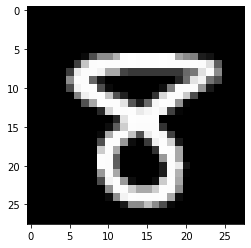

Shape of 3D array:  (60000, 28, 28)
Shape of 2D array:  (60000, 784)
Shape of dataframe for label 8 (5851, 784)
Plotting the first 10 eigenvectors of image: 8


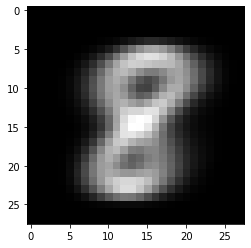

In [185]:
plot_og_recon(10)

**From the plotting images using function above, it seems that approximately 10 principal components is sufficient to identify the image.**

In [186]:
# compression ratio
original = 60000*784
print(f'The original dataset requires {original} elements to represent the images\n')

# 10 for singular values
compressed = 60000*10 + 10 + 10*784 
print(f'The compressed dataset only requires {compressed} elements to represent the images\n')

ratio = original/compressed
print(f'If we have a dataset of 60,000 images with 784 pixeles, the compression ratio would be {round(ratio,2)}')

The original dataset requires 47040000 elements to represent the images

The compressed dataset only requires 607850 elements to represent the images

If we have a dataset of 60,000 images with 784 pixeles, the compression ratio would be 77.39


**From the function above, it seems that approximately 10 principal components are sufficient to identify the image. If we have a dataset of 60,000 images with 784 pixels (features) to label them, there are a total of 60,000x784 = 47,040,000 elements to represent the images. The compressed dataset only requires 10 principal components and thus 60,000x10 (from left singular matrix) + 10 (10 singular values) + 10x784 (from right singular matrix) = 607,850 elements to represent the images. Thus, dividing the original number of elements by the compressed, we get a compression ratio of approximately 77.39.**